In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [9]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

In [10]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [16]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

In [18]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [22]:
df = pd.read_csv("Advertising.csv")

In [23]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  200
Number of columns are:  5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [26]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [27]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [28]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [29]:
df.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [30]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


In [31]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [32]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
dependent_variable = ['Sales']

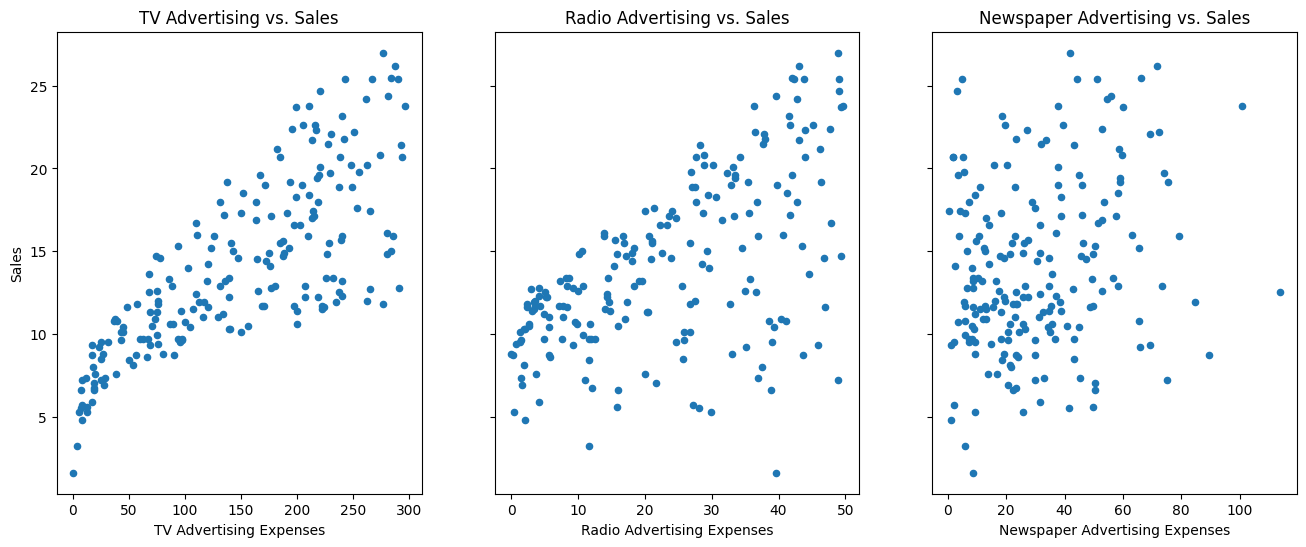

In [39]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs. Sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs. Sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Displaying the plots
plt.show()

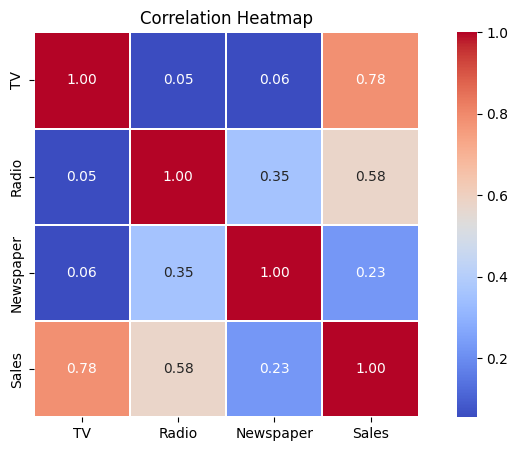

In [40]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

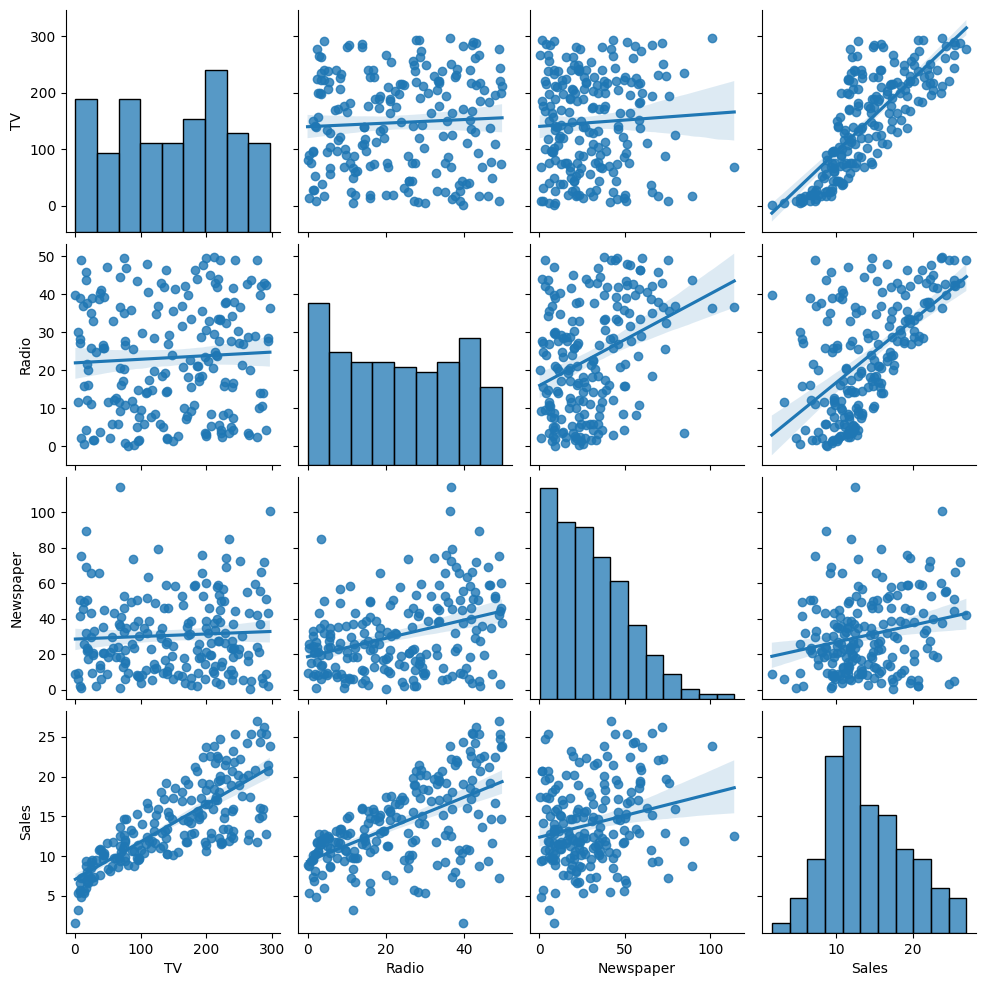

In [41]:
# Chart - 3 Pair plot visualization code
sns.pairplot(df,kind="reg");

# Display the plot
plt.show()

In [42]:
df=df[df['Newspaper']<=90]

In [43]:
features = [i for i in df.columns if i not in ['Sales']]
features

['TV', 'Radio', 'Newspaper']

In [45]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.8 MB 2.2 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6

In [46]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [47]:
continuous_variables = ['TV', 'Radio', 'Newspaper']

In [48]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [49]:
continuous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [50]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [51]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


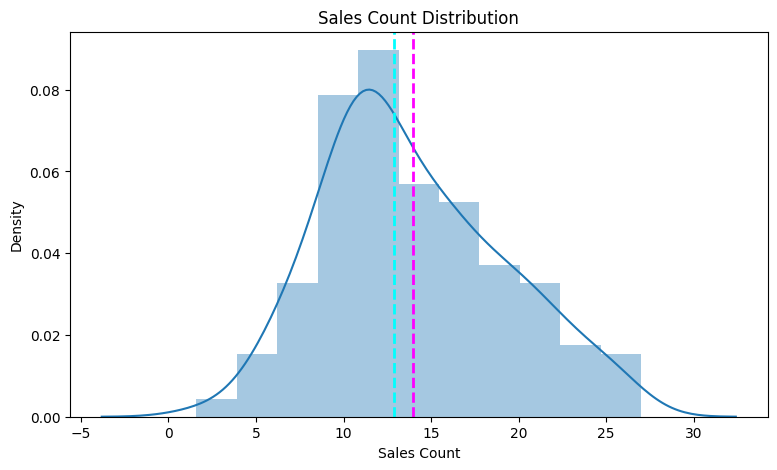

In [52]:
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Sales Count')
plt.title('Sales Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [53]:
df[dependent_variable].skew()

Sales    0.40713
dtype: float64

In [54]:
X = df.drop('Sales',axis=1)
y = df[dependent_variable]

In [55]:
features

['TV', 'Radio', 'Newspaper']

In [56]:
features = [i for i in df.columns if i not in ['Sales']]

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
y_train.value_counts()

Sales
9.7      4
15.9     3
20.7     3
12.2     3
11.8     3
        ..
12.4     1
12.3     1
11.2     1
10.9     1
27.0     1
Name: count, Length: 109, dtype: int64

In [60]:
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
   and returns a list of the model scores'''

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  y_train_pred = model.predict(X_train)  # Predict the target variable for the training set
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test,y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Sales', fontsize=12)


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [61]:
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

In [62]:

# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

MSE : 2.43207668246954
RMSE : 1.5595116807736773
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000559
Adjusted R2 :  0.9023858555583939


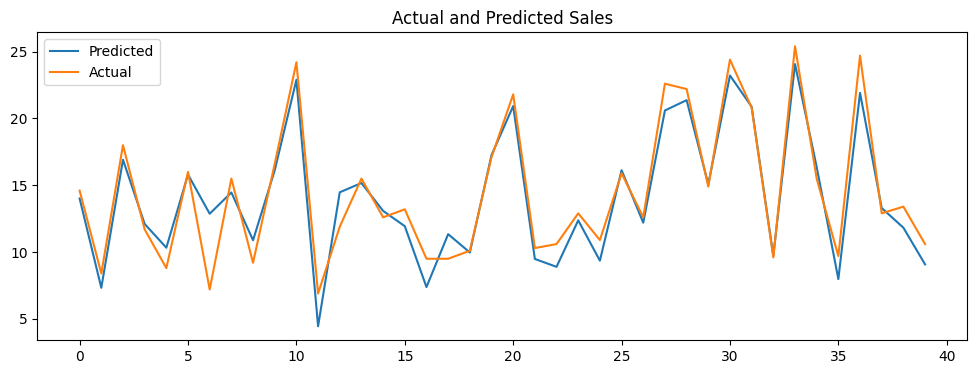

In [63]:

# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

In [64]:
score

,Linear regression
MSE,2.432077
RMSE,1.559512
MAE,1.177153
Train R2,0.889832
Test R2,0.909895
Adjusted R2,0.902386


In [65]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [66]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8794637215026521


In [67]:
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [68]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [69]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 2.43207668246954
RMSE : 1.5595116807736773
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000559
Adjusted R2 :  0.9023858555583939


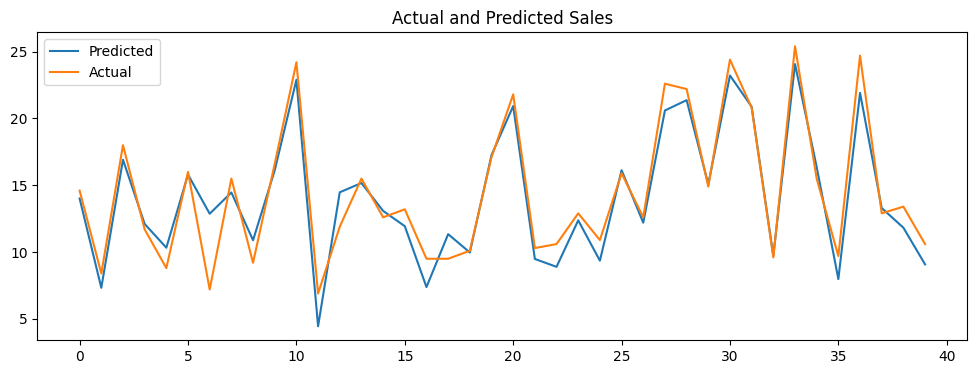

In [70]:

# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [71]:

# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,2.432077,2.432077
RMSE,1.559512,1.559512
MAE,1.177153,1.177153
Train R2,0.889832,0.889832
Test R2,0.909895,0.909895
Adjusted R2,0.902386,0.902386
